**Part 1: Finding TF-IDF score of each word**

The text file, article.txt containing a simple article regarding how Eliud Kipchoge broke the 2-hour marathon barrier.
<br>
At first, the file is read and all the strings are stored in Pandas DataFrame format.

In [ ]:
#Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
import nltk
nltk.download('stopwords')

# Just making the plots look better
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

str_article = list()
article_files = glob.glob('article.txt')
d = list()
for article in article_files:
    with open(article, encoding='utf-8') as f:
        filename = os.path.basename(article.split('.')[0])
        lines = (line.rstrip() for line in f) # All lines including the blank ones
        lines = list(line for line in lines if line) # Non-blank lines
        #str_article.rstrip()
        d.append(pd.DataFrame({'article': "article", 'paragraph': lines}))
doc = pd.concat(d)
doc
#print(str_article)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,article,paragraph
0,article,Eliud Kipchoge makes history by running sub tw...
1,article,It was the marathon that turned into a sprint....
2,article,Eliud Kipchoge had brushed aside his pacemaker...
3,article,It was already known that Kipchoge is an extra...
4,article,"“I felt a lot of pressure yesterday,” Kipchoge..."
5,article,Kipchoge described the period between a 4.50am...
6,article,Giddy comparisons to other sporting and histor...
7,article,This was an operation afforded military levels...
8,article,"Ineos, a petrochemical company not exempt from..."
9,article,Ratcliffe was afforded the kind of canned laug...


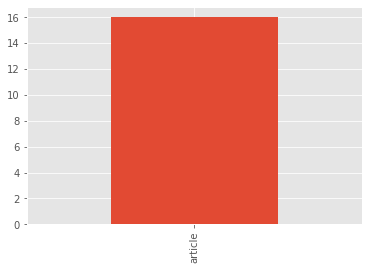

In [ ]:
doc['article'].value_counts().plot.bar();

Importing NLTK corpus to remove stop words from the vector.

In [ ]:
from nltk.corpus import stopwords

Split the lines into sentences/words.

In [ ]:
doc['sentences'] = doc.paragraph.str.rstrip('.').str.split('[\.]\s+')
doc['words'] = doc.paragraph.str.strip().str.split('[\W_]+')

#This line is used to remove the English stop words
stop = stopwords.words('english')
doc['words'] = doc['words'].apply(lambda x: [item for item in x if item not in stop])
#doc.head()
doc

,article,paragraph,sentences,words
0,article,Eliud Kipchoge makes history by running sub tw...,[Eliud Kipchoge makes history by running sub t...,"[Eliud, Kipchoge, makes, history, running, sub..."
1,article,It was the marathon that turned into a sprint....,[It was the marathon that turned into a sprint...,"[It, marathon, turned, sprint, Even, strongest..."
2,article,Eliud Kipchoge had brushed aside his pacemaker...,[Eliud Kipchoge had brushed aside his pacemake...,"[Eliud, Kipchoge, brushed, aside, pacemakers, ..."
3,article,It was already known that Kipchoge is an extra...,[It was already known that Kipchoge is an extr...,"[It, already, known, Kipchoge, extraordinary, ..."
4,article,"“I felt a lot of pressure yesterday,” Kipchoge...","[“I felt a lot of pressure yesterday,” Kipchog...","[, I, felt, lot, pressure, yesterday, Kipchoge..."
5,article,Kipchoge described the period between a 4.50am...,[Kipchoge described the period between a 4.50a...,"[Kipchoge, described, period, 4, 50am, wake, c..."
6,article,Giddy comparisons to other sporting and histor...,[Giddy comparisons to other sporting and histo...,"[Giddy, comparisons, sporting, historical, act..."
7,article,This was an operation afforded military levels...,[This was an operation afforded military level...,"[This, operation, afforded, military, levels, ..."
8,article,"Ineos, a petrochemical company not exempt from...","[Ineos, a petrochemical company not exempt fro...","[Ineos, petrochemical, company, exempt, bad, p..."
9,article,Ratcliffe was afforded the kind of canned laug...,[Ratcliffe was afforded the kind of canned lau...,"[Ratcliffe, afforded, kind, canned, laughter, ..."


Split the paragraph into sentences.

In [ ]:
rows = list()
for row in doc[['paragraph', 'sentences']].iterrows():
    r = row[1]
    for sentence in r.sentences:
        rows.append((r.paragraph, sentence))

sentences = pd.DataFrame(rows, columns=['paragraph', 'sentences'])
#sentences = sentences[sentences.sentences.str.len() > 0]
sentences.head()

,paragraph,sentences
0,Eliud Kipchoge makes history by running sub tw...,Eliud Kipchoge makes history by running sub tw...
1,It was the marathon that turned into a sprint....,It was the marathon that turned into a sprint
2,It was the marathon that turned into a sprint....,Even the strongest cynics – and they are not h...
3,Eliud Kipchoge had brushed aside his pacemaker...,Eliud Kipchoge had brushed aside his pacemakers
4,Eliud Kipchoge had brushed aside his pacemaker...,The Kenyan pointed to and waved at adoring gal...


Split the paragraph into words.

In [ ]:
rows = list()
for row in doc[['paragraph', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.paragraph, word))

words = pd.DataFrame(rows, columns=['paragraph', 'words'])
#remove empty spaces and change words to lower case
words = words[words.words.str.len() > 0]
words['words'] = words.words.str.lower()
#words.head()
#words


Calculate word counts in the article.

In [ ]:
rows = list()
for row in doc[['article', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.article, word))

wordcount = pd.DataFrame(rows, columns=['article', 'words'])
wordcount['words'] = wordcount.words.str.lower()
wordcount.words = wordcount.words.str.replace('\d+', '')
wordcount.words = wordcount.words.str.replace(r'^the', '')
wordcount = wordcount[wordcount.words.str.len() > 2]  


counts = wordcount.groupby('article')\
    .words.value_counts()\
    .to_frame()\
    .rename(columns={'words':'n_w'})
#counts.head()
counts
#wordcount
#wordcount.words.tolist()
#counts.columns

n_w
article words           
article kipchoge      15
        marathon       7
        man            4
        running        4
        said           4
        that           4
        clock          3
        four           3
        history        3
        morning        3
        one            3
        pacemakers     3
        point          3
        stretch        3
        this           3
        vienna         3
        when           3
        world          3
        afforded       2
        aside          2
        athlete        2
        best           2
        calls          2
        come           2
        company        2
        defined        2
        eliud          2
        even           2
        first          2
        hills          2
...                  ...
        trained        1
        transpired     1
        troubled       1
        troubles       1
        true           1
        try            1
        turned         1
        unaffected     1
        unavoidable    1
        unique         1
        untrue         1
        view           1
        wake           1
        walked         1
        want           1
        waved          1
        wealth         1
        went           1
        what           1
        wide           1
        widely         1
        winner         1
        with           1
        within         1
        would          1
        wounded        1
        year           1
        years          1
        yesterday      1
        yet            1

[355 rows x 1 columns]

Plot number frequency graph.

n_w
article words          
article kipchoge     15
        marathon      7
        man           4
        running       4
        said          4
        that          4
        clock         3
        four          3
        history       3
        morning       3
        one           3
        pacemakers    3
        point         3
        stretch       3
        this          3
        vienna        3
        when          3
        world         3
        afforded      2
        aside         2

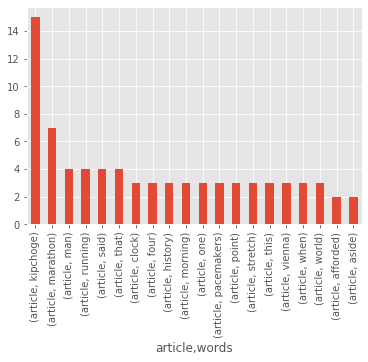

In [ ]:
def pretty_plot_top_n(series, top_n=20, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])


In [ ]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum


,n_d
article,
article,441


In [ ]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

tf.head()
#tf

n_w  n_d        tf
article words                       
article kipchoge   15  441  0.034014
        marathon    7  441  0.015873
        man         4  441  0.009070
        running     4  441  0.009070
        said        4  441  0.009070

Plot top 20 words based on TF

tf
article words               
article kipchoge    0.034014
        marathon    0.015873
        man         0.009070
        running     0.009070
        said        0.009070
        that        0.009070
        clock       0.006803
        four        0.006803
        history     0.006803
        morning     0.006803
        one         0.006803
        pacemakers  0.006803
        point       0.006803
        stretch     0.006803
        this        0.006803
        vienna      0.006803
        when        0.006803
        world       0.006803
        afforded    0.004535
        aside       0.004535

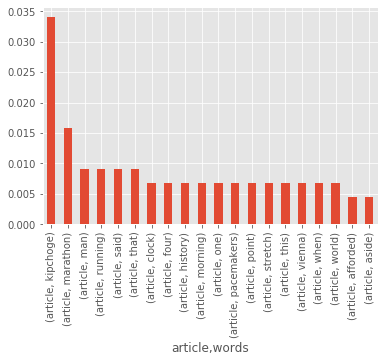

In [ ]:
pretty_plot_top_n(tf['tf'])

In [ ]:
c_d = wordcount.article.nunique()
c_d

1

In [ ]:
idf = wordcount.groupby('words')\
    .article\
    .nunique()\
    .to_frame()\
    .rename(columns={'article':'i_d'})\
    .sort_values('i_d')
idf.head()


,i_d
words,
achieve,1
pursuit,1
publicity,1
public,1
prototype,1


In [ ]:
idf['idf'] = np.log(c_d/idf.i_d.values)

idf.head()
#idf

,i_d,idf
words,,
achieve,1,0.0
pursuit,1,0.0
publicity,1,0.0
public,1,0.0
prototype,1,0.0


IDF values are all zeros because in this example, only 1 article is considered & all unique words appeared in the same article.  IDF values are 0 if it appears in all the documents.

In [ ]:
tf_idf = tf.join(idf)

tf_idf.head()
#tf_idf

n_w  n_d        tf  i_d  idf
article words                                 
article kipchoge   15  441  0.034014    1  0.0
        marathon    7  441  0.015873    1  0.0
        man         4  441  0.009070    1  0.0
        running     4  441  0.009070    1  0.0
        said        4  441  0.009070    1  0.0

In [ ]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()
#tf_idf

n_w  n_d        tf  i_d  idf  tf_idf
article words                                         
article kipchoge   15  441  0.034014    1  0.0     0.0
        marathon    7  441  0.015873    1  0.0     0.0
        man         4  441  0.009070    1  0.0     0.0
        running     4  441  0.009070    1  0.0     0.0
        said        4  441  0.009070    1  0.0     0.0


-------------------------------------------------
**Part 2: Using Hopfield Network to find the most important words**

In this part, the TF scores are treated as the Frequency Vector i.e. the input to Hopfield Network.

Frequency Matrix is constructed to be treated as Hopfield Network weights.

In [ ]:
freq_matrix = pd.DataFrame(np.outer(tf_idf["tf"], tf_idf["tf"]), tf_idf["tf"].index, tf_idf["tf"].index)
#freq_matrix.head()
freq_matrix

article               article                                          \
words                kipchoge  marathon       man   running      said   
article words                                                           
article kipchoge     0.001157  0.000540  0.000309  0.000309  0.000309   
        marathon     0.000540  0.000252  0.000144  0.000144  0.000144   
        man          0.000309  0.000144  0.000082  0.000082  0.000082   
        running      0.000309  0.000144  0.000082  0.000082  0.000082   
        said         0.000309  0.000144  0.000082  0.000082  0.000082   
        that         0.000309  0.000144  0.000082  0.000082  0.000082   
        clock        0.000231  0.000108  0.000062  0.000062  0.000062   
        four         0.000231  0.000108  0.000062  0.000062  0.000062   
        history      0.000231  0.000108  0.000062  0.000062  0.000062   
        morning      0.000231  0.000108  0.000062  0.000062  0.000062   
        one          0.000231  0.000108  0.000062  0.000062  0.000062   
        pacemakers   0.000231  0.000108  0.000062  0.000062  0.000062   
        point        0.000231  0.000108  0.000062  0.000062  0.000062   
        stretch      0.000231  0.000108  0.000062  0.000062  0.000062   
        this         0.000231  0.000108  0.000062  0.000062  0.000062   
        vienna       0.000231  0.000108  0.000062  0.000062  0.000062   
        when         0.000231  0.000108  0.000062  0.000062  0.000062   
        world        0.000231  0.000108  0.000062  0.000062  0.000062   
        afforded     0.000154  0.000072  0.000041  0.000041  0.000041   
        aside        0.000154  0.000072  0.000041  0.000041  0.000041   
        athlete      0.000154  0.000072  0.000041  0.000041  0.000041   
        best         0.000154  0.000072  0.000041  0.000041  0.000041   
        calls        0.000154  0.000072  0.000041  0.000041  0.000041   
        come         0.000154  0.000072  0.000041  0.000041  0.000041   
        company      0.000154  0.000072  0.000041  0.000041  0.000041   
        defined      0.000154  0.000072  0.000041  0.000041  0.000041   
        eliud        0.000154  0.000072  0.000041  0.000041  0.000041   
        even         0.000154  0.000072  0.000041  0.000041  0.000041   
        first        0.000154  0.000072  0.000041  0.000041  0.000041   
        hills        0.000154  0.000072  0.000041  0.000041  0.000041   
...                       ...       ...       ...       ...       ...   
        trained      0.000077  0.000036  0.000021  0.000021  0.000021   
        transpired   0.000077  0.000036  0.000021  0.000021  0.000021   
        troubled     0.000077  0.000036  0.000021  0.000021  0.000021   
        troubles     0.000077  0.000036  0.000021  0.000021  0.000021   
        true         0.000077  0.000036  0.000021  0.000021  0.000021   
        try          0.000077  0.000036  0.000021  0.000021  0.000021   
        turned       0.000077  0.000036  0.000021  0.000021  0.000021   
        unaffected   0.000077  0.000036  0.000021  0.000021  0.000021   
        unavoidable  0.000077  0.000036  0.000021  0.000021  0.000021   
        unique       0.000077  0.000036  0.000021  0.000021  0.000021   
        untrue       0.000077  0.000036  0.000021  0.000021  0.000021   
        view         0.000077  0.000036  0.000021  0.000021  0.000021   
        wake         0.000077  0.000036  0.000021  0.000021  0.000021   
        walked       0.000077  0.000036  0.000021  0.000021  0.000021   
        want         0.000077  0.000036  0.000021  0.000021  0.000021   
        waved        0.000077  0.000036  0.000021  0.000021  0.000021   
        wealth       0.000077  0.000036  0.000021  0.000021  0.000021   
        went         0.000077  0.000036  0.000021  0.000021  0.000021   
        what         0.000077  0.000036  0.000021  0.000021  0.000021   
        wide         0.000077  0.000036  0.000021  0.000021  0.000021   
        widely       0.000077  0.000036  0.000021  0.00002

Finding the maximum of the frequency vector and matrix

In [ ]:
vector_max = tf_idf['tf'].max()
print(vector_max)
matrix_max = freq_matrix.max().max()
print(matrix_max)

0.034013605442176874
0.0011569253551760843


Normalizing the frequency vector

In [ ]:
tf_idf['norm_freq'] = tf_idf.tf / vector_max

temp_df = tf_idf[['tf', 'norm_freq']]
#temp_df
temp_df.head(20)

#tf_idf.head()
#tf_idf

tf  norm_freq
article words                          
article kipchoge    0.034014   1.000000
        marathon    0.015873   0.466667
        man         0.009070   0.266667
        running     0.009070   0.266667
        said        0.009070   0.266667
        that        0.009070   0.266667
        clock       0.006803   0.200000
        four        0.006803   0.200000
        history     0.006803   0.200000
        morning     0.006803   0.200000
        one         0.006803   0.200000
        pacemakers  0.006803   0.200000
        point       0.006803   0.200000
        stretch     0.006803   0.200000
        this        0.006803   0.200000
        vienna      0.006803   0.200000
        when        0.006803   0.200000
        world       0.006803   0.200000
        afforded    0.004535   0.133333
        aside       0.004535   0.133333

Normalizing the frequency matrix

In [ ]:
freq_matrix_norm = freq_matrix.div(matrix_max)
freq_matrix_norm

article               article                                          \
words                kipchoge  marathon       man   running      said   
article words                                                           
article kipchoge     1.000000  0.466667  0.266667  0.266667  0.266667   
        marathon     0.466667  0.217778  0.124444  0.124444  0.124444   
        man          0.266667  0.124444  0.071111  0.071111  0.071111   
        running      0.266667  0.124444  0.071111  0.071111  0.071111   
        said         0.266667  0.124444  0.071111  0.071111  0.071111   
        that         0.266667  0.124444  0.071111  0.071111  0.071111   
        clock        0.200000  0.093333  0.053333  0.053333  0.053333   
        four         0.200000  0.093333  0.053333  0.053333  0.053333   
        history      0.200000  0.093333  0.053333  0.053333  0.053333   
        morning      0.200000  0.093333  0.053333  0.053333  0.053333   
        one          0.200000  0.093333  0.053333  0.053333  0.053333   
        pacemakers   0.200000  0.093333  0.053333  0.053333  0.053333   
        point        0.200000  0.093333  0.053333  0.053333  0.053333   
        stretch      0.200000  0.093333  0.053333  0.053333  0.053333   
        this         0.200000  0.093333  0.053333  0.053333  0.053333   
        vienna       0.200000  0.093333  0.053333  0.053333  0.053333   
        when         0.200000  0.093333  0.053333  0.053333  0.053333   
        world        0.200000  0.093333  0.053333  0.053333  0.053333   
        afforded     0.133333  0.062222  0.035556  0.035556  0.035556   
        aside        0.133333  0.062222  0.035556  0.035556  0.035556   
        athlete      0.133333  0.062222  0.035556  0.035556  0.035556   
        best         0.133333  0.062222  0.035556  0.035556  0.035556   
        calls        0.133333  0.062222  0.035556  0.035556  0.035556   
        come         0.133333  0.062222  0.035556  0.035556  0.035556   
        company      0.133333  0.062222  0.035556  0.035556  0.035556   
        defined      0.133333  0.062222  0.035556  0.035556  0.035556   
        eliud        0.133333  0.062222  0.035556  0.035556  0.035556   
        even         0.133333  0.062222  0.035556  0.035556  0.035556   
        first        0.133333  0.062222  0.035556  0.035556  0.035556   
        hills        0.133333  0.062222  0.035556  0.035556  0.035556   
...                       ...       ...       ...       ...       ...   
        trained      0.066667  0.031111  0.017778  0.017778  0.017778   
        transpired   0.066667  0.031111  0.017778  0.017778  0.017778   
        troubled     0.066667  0.031111  0.017778  0.017778  0.017778   
        troubles     0.066667  0.031111  0.017778  0.017778  0.017778   
        true         0.066667  0.031111  0.017778  0.017778  0.017778   
        try          0.066667  0.031111  0.017778  0.017778  0.017778   
        turned       0.066667  0.031111  0.017778  0.017778  0.017778   
        unaffected   0.066667  0.031111  0.017778  0.017778  0.017778   
        unavoidable  0.066667  0.031111  0.017778  0.017778  0.017778   
        unique       0.066667  0.031111  0.017778  0.017778  0.017778   
        untrue       0.066667  0.031111  0.017778  0.017778  0.017778   
        view         0.066667  0.031111  0.017778  0.017778  0.017778   
        wake         0.066667  0.031111  0.017778  0.017778  0.017778   
        walked       0.066667  0.031111  0.017778  0.017778  0.017778   
        want         0.066667  0.031111  0.017778  0.017778  0.017778   
        waved        0.066667  0.031111  0.017778  0.017778  0.017778   
        wealth       0.066667  0.031111  0.017778  0.017778  0.017778   
        went         0.066667  0.031111  0.017778  0.017778  0.017778   
        what         0.066667  0.031111  0.017778  0.017778  0.017778   
        wide         0.066667  0.031111  0.017778  0.017778  0.017778   
        widely       0.066667  0.031111  0.017778  0.01777

Force the matrix diagonal to be zero to ignore the diagonal.  
This is necessary because the output of a neuron in Hopfield Network is connected to all other neurons except for itself.

In [ ]:
np.fill_diagonal(freq_matrix_norm.values, 0)
freq_matrix_norm

article               article                                          \
words                kipchoge  marathon       man   running      said   
article words                                                           
article kipchoge     0.000000  0.466667  0.266667  0.266667  0.266667   
        marathon     0.466667  0.000000  0.124444  0.124444  0.124444   
        man          0.266667  0.124444  0.000000  0.071111  0.071111   
        running      0.266667  0.124444  0.071111  0.000000  0.071111   
        said         0.266667  0.124444  0.071111  0.071111  0.000000   
        that         0.266667  0.124444  0.071111  0.071111  0.071111   
        clock        0.200000  0.093333  0.053333  0.053333  0.053333   
        four         0.200000  0.093333  0.053333  0.053333  0.053333   
        history      0.200000  0.093333  0.053333  0.053333  0.053333   
        morning      0.200000  0.093333  0.053333  0.053333  0.053333   
        one          0.200000  0.093333  0.053333  0.053333  0.053333   
        pacemakers   0.200000  0.093333  0.053333  0.053333  0.053333   
        point        0.200000  0.093333  0.053333  0.053333  0.053333   
        stretch      0.200000  0.093333  0.053333  0.053333  0.053333   
        this         0.200000  0.093333  0.053333  0.053333  0.053333   
        vienna       0.200000  0.093333  0.053333  0.053333  0.053333   
        when         0.200000  0.093333  0.053333  0.053333  0.053333   
        world        0.200000  0.093333  0.053333  0.053333  0.053333   
        afforded     0.133333  0.062222  0.035556  0.035556  0.035556   
        aside        0.133333  0.062222  0.035556  0.035556  0.035556   
        athlete      0.133333  0.062222  0.035556  0.035556  0.035556   
        best         0.133333  0.062222  0.035556  0.035556  0.035556   
        calls        0.133333  0.062222  0.035556  0.035556  0.035556   
        come         0.133333  0.062222  0.035556  0.035556  0.035556   
        company      0.133333  0.062222  0.035556  0.035556  0.035556   
        defined      0.133333  0.062222  0.035556  0.035556  0.035556   
        eliud        0.133333  0.062222  0.035556  0.035556  0.035556   
        even         0.133333  0.062222  0.035556  0.035556  0.035556   
        first        0.133333  0.062222  0.035556  0.035556  0.035556   
        hills        0.133333  0.062222  0.035556  0.035556  0.035556   
...                       ...       ...       ...       ...       ...   
        trained      0.066667  0.031111  0.017778  0.017778  0.017778   
        transpired   0.066667  0.031111  0.017778  0.017778  0.017778   
        troubled     0.066667  0.031111  0.017778  0.017778  0.017778   
        troubles     0.066667  0.031111  0.017778  0.017778  0.017778   
        true         0.066667  0.031111  0.017778  0.017778  0.017778   
        try          0.066667  0.031111  0.017778  0.017778  0.017778   
        turned       0.066667  0.031111  0.017778  0.017778  0.017778   
        unaffected   0.066667  0.031111  0.017778  0.017778  0.017778   
        unavoidable  0.066667  0.031111  0.017778  0.017778  0.017778   
        unique       0.066667  0.031111  0.017778  0.017778  0.017778   
        untrue       0.066667  0.031111  0.017778  0.017778  0.017778   
        view         0.066667  0.031111  0.017778  0.017778  0.017778   
        wake         0.066667  0.031111  0.017778  0.017778  0.017778   
        walked       0.066667  0.031111  0.017778  0.017778  0.017778   
        want         0.066667  0.031111  0.017778  0.017778  0.017778   
        waved        0.066667  0.031111  0.017778  0.017778  0.017778   
        wealth       0.066667  0.031111  0.017778  0.017778  0.017778   
        went         0.066667  0.031111  0.017778  0.017778  0.017778   
        what         0.066667  0.031111  0.017778  0.017778  0.017778   
        wide         0.066667  0.031111  0.017778  0.017778  0.017778   
        widely       0.066667  0.031111  0.017778  0.01777

Manually testing the output based on Hopfield neural network formula where <font color=blue>*freq_matrix_norm*</font> is the <font color=red>*W*</font> & <font color=blue>*tf_idf["norm_freq"]*</font> is the <font color=red>vector of frequency</font> which is normalized.


After 15 iteration, it is shown that the word <font color=green>***kipchoge***</font> and <font color=green>***marathon***</font> is the the most important word. It is highly that it is accurate because the article was about the performance of Eliud Kipchoge running a marathon.

Disclaimer:  This part can be totally commented out but kept as a reference with the actual algorithm implemented later.

In [ ]:
#define sigmoid function
#currently just a placeholder because tanh activation function is selected instead
def sigmoid(x):
    beta = 1
    return 1 / (1 + np.exp(-x * beta))


tf_idf["hopfield_value"] = np.tanh(freq_matrix_norm @ tf_idf["norm_freq"])
temp = np.tanh(freq_matrix_norm @ tf_idf["hopfield_value"])
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
#temp
#temp
#temp.head()
temp.head(20)

article  words     
article  kipchoge      1.000000
         marathon      1.000000
         man           0.999999
         running       0.999999
         said          0.999999
         that          0.999999
         clock         0.999976
         four          0.999976
         history       0.999976
         morning       0.999976
         one           0.999976
         pacemakers    0.999976
         point         0.999976
         stretch       0.999976
         this          0.999976
         vienna        0.999976
         when          0.999976
         world         0.999976
         afforded      0.998961
         aside         0.998961
dtype: float64

**Algorithm for Hopfield Neural Network**

Hopfield Loop exited at Iteration 23


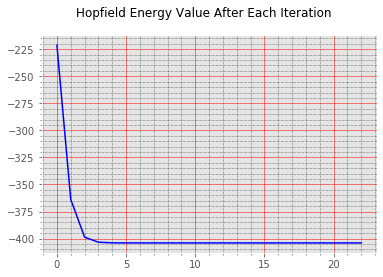

In [ ]:
#safe limit
itr = 0
zero_itr = 0
max_itr = 5    #maximum iteration where Delta Energy is 0
char_list = []
delta_energy = 0
threshold = 0
energy = 0
init_energy = 0

tf_idf["hopfield_value"] = np.tanh(freq_matrix_norm @ tf_idf["norm_freq"])

while (delta_energy < 0.0001):
    itr = itr + 1
    #Calculation of output vector from Hopfield Network
    #y = activation_function(sum(W * x))
    tf_idf["hopfield_value"] = np.tanh(freq_matrix_norm @ tf_idf["hopfield_value"])
    
    #Calculation of Hopfield Energy Function and its Delta
    #E = [-1/2 * sum(Wij * xi * xj)] + [sum(threshold*xi)]
    energy = (-0.5 * tf_idf["hopfield_value"] @ freq_matrix_norm @ tf_idf["hopfield_value"]) \
              + (np.sum(threshold * tf_idf["hopfield_value"]))
    #Append to list for characterization
    char_list.append(energy)
    #Find Delta for Energy
    delta_energy = energy - init_energy
    #print ('Energy = {}'.format(energy))
    #print ('Init_Energy = {}'.format(init_energy))
    #print ('Delta_Energy = {}'.format(delta_energy))
    #print ()    
    init_energy = energy     #Setting the current energy to be previous energy in next iteration
    
    #break the loop if Delta Energy reached zero after a certain iteration
    if (delta_energy == 0):
        zero_itr = zero_itr + 1
        if (zero_itr == max_itr):
            print("Hopfield Loop exited at Iteration {}".format(itr))
            break


big_grid = np.arange(0,itr)
plt.plot(big_grid,char_list, color ='blue')
plt.suptitle('Hopfield Energy Value After Each Iteration')
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.rcParams['figure.figsize'] = [13, 6]
plt.show()
#tf_idf.head()
#tf_idf
#final_hopfield_output = tf_idf["hopfield_value"]

In [ ]:
final_output_vector = tf_idf["hopfield_value"]
final_output_vector.head(10)
#final_output_vector.head()
#final_output_vector
#tf_idf

article  words   
article  kipchoge    1.000000
         marathon    1.000000
         man         0.999999
         running     0.999999
         said        0.999999
         that        0.999999
         clock       0.999976
         four        0.999976
         history     0.999976
         morning     0.999976
Name: hopfield_value, dtype: float64

Once again, it is shown that the words <font color=green>***kipchoge***</font> and <font color=green>***marathon***</font> are the the most important word. It is highly likely that it is accurate because the article was about the performance of Eliud Kipchoge running a marathon.


-------------------------------------------------
**Part 3: Article Summary**

New DataFrame is created and word index, starting & stopping position of sentences are calculated.

In [ ]:
txt_smr_sentences = pd.DataFrame({'sentences': sentences.sentences})
txt_smr_sentences['words'] = txt_smr_sentences.sentences.str.strip().str.split('[\W_]+')

rows = list()
for row in txt_smr_sentences[['sentences', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.sentences, word))

txt_smr_sentences = pd.DataFrame(rows, columns=['sentences', 'words'])
#remove empty spaces and change words to lower case
txt_smr_sentences['words'].replace('', np.nan, inplace=True)
txt_smr_sentences.dropna(subset=['words'], inplace=True)
txt_smr_sentences.reset_index(drop=True, inplace=True)
txt_smr_sentences['words'] = txt_smr_sentences.words.str.lower()

##Initialize 3 new columns
# w_ind = New word index
# s_strt = Starting index of a sentence
# s_stp = Stopping index of a sentence
# w_scr = Hopfield Value for words
txt_smr_sentences['w_ind'] = txt_smr_sentences.index + 1
txt_smr_sentences['s_strt'] = 0
txt_smr_sentences['s_stp'] = 0
txt_smr_sentences['w_scr'] = 0


#Iterate through the rows to check if the current sentence is equal to
#previous sentence.  If not equal, determine the "start" & "stop"
start = 0
stop = 0
prvs_string = ""
for i in txt_smr_sentences.index:
    #print (i)
    if (i == 0):
        start = 1
        txt_smr_sentences.iloc[i,3] = 1
        prvs_string = txt_smr_sentences.iloc[i,0]
    else:
        if (txt_smr_sentences.iloc[i,0] != prvs_string):
            stop = txt_smr_sentences.iloc[i-1,2]
            txt_smr_sentences.iloc[i-(stop-start)-1:i,4] = stop
            start = txt_smr_sentences.iloc[i,2]
            txt_smr_sentences.iloc[i,3] = start      
            prvs_string = txt_smr_sentences.iloc[i,0]
        else:
            txt_smr_sentences.iloc[i,3] = start
    if (i == len(txt_smr_sentences.index)-1):
        last_ind = txt_smr_sentences.w_ind.max()
        txt_smr_sentences.iloc[i-(last_ind-start):i+1,4] = last_ind

#New Column for length of sentence
txt_smr_sentences['length'] = txt_smr_sentences['s_stp'] - txt_smr_sentences['s_strt'] + 1

#Rearrange the Columns
txt_smr_sentences = txt_smr_sentences[['sentences', 's_strt', 's_stp', 'length', 'words', 'w_ind', 'w_scr']]

txt_smr_sentences.head(100)
#txt_smr_sentences

,sentences,s_strt,s_stp,length,words,w_ind,w_scr
0,Eliud Kipchoge makes history by running sub tw...,1,10,10,eliud,1,0
1,Eliud Kipchoge makes history by running sub tw...,1,10,10,kipchoge,2,0
2,Eliud Kipchoge makes history by running sub tw...,1,10,10,makes,3,0
3,Eliud Kipchoge makes history by running sub tw...,1,10,10,history,4,0
4,Eliud Kipchoge makes history by running sub tw...,1,10,10,by,5,0
5,Eliud Kipchoge makes history by running sub tw...,1,10,10,running,6,0
6,Eliud Kipchoge makes history by running sub tw...,1,10,10,sub,7,0
7,Eliud Kipchoge makes history by running sub tw...,1,10,10,two,8,0
8,Eliud Kipchoge makes history by running sub tw...,1,10,10,hour,9,0
9,Eliud Kipchoge makes history by running sub tw...,1,10,10,marathon,10,0


Check if word has Hopfield Score value, and update *txt_smr_sentences*

In [ ]:
for index, value in final_output_vector.items():
    for i in txt_smr_sentences.index:
        if(index[1] == txt_smr_sentences.iloc[i,4]):
            txt_smr_sentences.iloc[i,6] = value

#New Column for placeholder of sentences score
txt_smr_sentences['s_scr'] = txt_smr_sentences.w_scr

txt_smr_sentences.head(100)

,sentences,s_strt,s_stp,length,words,w_ind,w_scr,s_scr
0,Eliud Kipchoge makes history by running sub tw...,1,10,10,eliud,1,0.998961,0.998961
1,Eliud Kipchoge makes history by running sub tw...,1,10,10,kipchoge,2,1.000000,1.000000
2,Eliud Kipchoge makes history by running sub tw...,1,10,10,makes,3,0.955824,0.955824
3,Eliud Kipchoge makes history by running sub tw...,1,10,10,history,4,0.999976,0.999976
4,Eliud Kipchoge makes history by running sub tw...,1,10,10,by,5,0.000000,0.000000
5,Eliud Kipchoge makes history by running sub tw...,1,10,10,running,6,0.999999,0.999999
6,Eliud Kipchoge makes history by running sub tw...,1,10,10,sub,7,0.955824,0.955824
7,Eliud Kipchoge makes history by running sub tw...,1,10,10,two,8,0.998961,0.998961
8,Eliud Kipchoge makes history by running sub tw...,1,10,10,hour,9,0.955824,0.955824
9,Eliud Kipchoge makes history by running sub tw...,1,10,10,marathon,10,1.000000,1.000000


In [ ]:
# three_sigma = 3 * math.sqrt((tf_idf.loc[:,"hopfield_value"].var()))
# three_sigma
# tf_idf["hopfield_value"]

Merge the DataFrame into a new one that sum the score of the words in each sentences and group them by sentences.

The sentences are also ranked based on the highest scores.

In [ ]:
aggregation_functions = {'s_strt': 'first', \
                         's_stp': 'first', \
                         'length': 'first', \
                         's_scr': 'sum'}
tss_new = txt_smr_sentences.groupby(txt_smr_sentences['sentences']).aggregate(aggregation_functions)\
            .sort_values(by='s_scr', ascending=False).reset_index()
tss_new

,sentences,s_strt,s_stp,length,s_scr
0,Even the strongest cynics – and they are not h...,20,56,37,18.509862
1,He is not at all troubled by the fact the IAAF...,607,643,37,18.423588
2,With the clock stopped and a sporting world lo...,165,193,29,17.423565
3,When Kipchoge’s status as a Nike athlete - the...,538,570,33,17.336301
4,"In the inevitable, wide-ranging assessment of ...",116,142,27,15.598190
5,It is altogether fair to reference Roger Banni...,276,303,28,15.424652
6,"Dave Brailsford, seemingly unaffected by the c...",513,537,25,14.554087
7,Teams of seven pacemakers – in a phalanx forma...,363,393,31,14.469842
8,"Jim Ratcliffe, the company’s founder and riche...",477,497,21,13.599301
9,The Kenyan pointed to and waved at adoring gal...,64,87,24,13.468828


Finding 10% of the whole article and print them as a summary

In [ ]:
import math

max_word = math.floor(0.1 * tss_new['s_stp'].max())
print("Max word amount for summary: {}\n".format(max_word))

summary = tss_new.loc[tss_new['s_strt'] == 1, 'sentences'].iloc[0] + ". " ##Consider the Title of the Article
length_printed = 0

for i in tss_new.index:
    if (length_printed <= max_word):
        summary +=  tss_new.iloc[i,0] + ". "
        length_printed += tss_new.iloc[i,3]  ##Consider the sentence where max_word appear in the middle
    else:
        break

print(summary)

Max word amount for summary: 83

Eliud Kipchoge makes history by running sub two-hour marathon. Even the strongest cynics – and they are not hard to come by – had to smile at the 500-metre final stretch that defined the making of history: the marathon distance has been completed in under two hours. He is not at all troubled by the fact the IAAF does not recognise this feat as a record, a scenario perhaps impacted by the detail that he holds the world’s best official marathon time anyway. With the clock stopped and a sporting world looking on with awe, the 34-year-old Kenyan displayed all the physical strain of having walked for the morning papers. 


Taking into account the title as well as the the last sentence where 10% of word appear in the middle, the result is as follow:

***Eliud Kipchoge makes history by running sub two-hour marathon. Even the strongest cynics – and they are not hard to come by – had to smile at the 500-metre final stretch that defined the making of history: the marathon distance has been completed in under two hours. He is not at all troubled by the fact the IAAF does not recognise this feat as a record, a scenario perhaps impacted by the detail that he holds the world’s best official marathon time anyway. With the clock stopped and a sporting world looking on with awe, the 34-year-old Kenyan displayed all the physical strain of having walked for the morning papers.***

In [4]:
!jupyter nbconvert --to html ./article_summarization.ipynb

[NbConvertApp] Converting notebook ./article_summarization.ipynb to html
[NbConvertApp] Writing 595092 bytes to ./article_summarization.html
